<a href="https://colab.research.google.com/github/codingshinobi/mlprojects/blob/gh-pages/House_prices_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# Importing dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
!pip install xgboost

import warnings
warnings.filterwarnings('ignore')

In [5]:
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression

In [48]:
sns.set_theme(context='notebook', style='whitegrid', palette='icefire', font='sans-serif', font_scale=1, color_codes=True, rc=None)
from scipy.stats import skew, norm, boxcox_normmax


## UNDERSTANDING THE DATA

In [7]:
# Importing the dataset
train_df= pd.read_csv(r"E:\DATASETS\House Prices - Advanced Regression Techniques\train.csv")
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [8]:
# test dataset
test_df = pd.read_csv(r"E:\DATASETS\House Prices - Advanced Regression Techniques\test.csv")
test_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


This dataset has 81 columns or 80 features and 1 label.

Now let's try to understand the dataset.

In [9]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [10]:
train_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


We can already see some of the data is missing in some of the columns and some of the features have outliers too. Before cleaning the data let's have a look at the correlation between the features.

In [11]:
train_df.corr()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,...,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.050298,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,...,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.005024,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420


<AxesSubplot:>

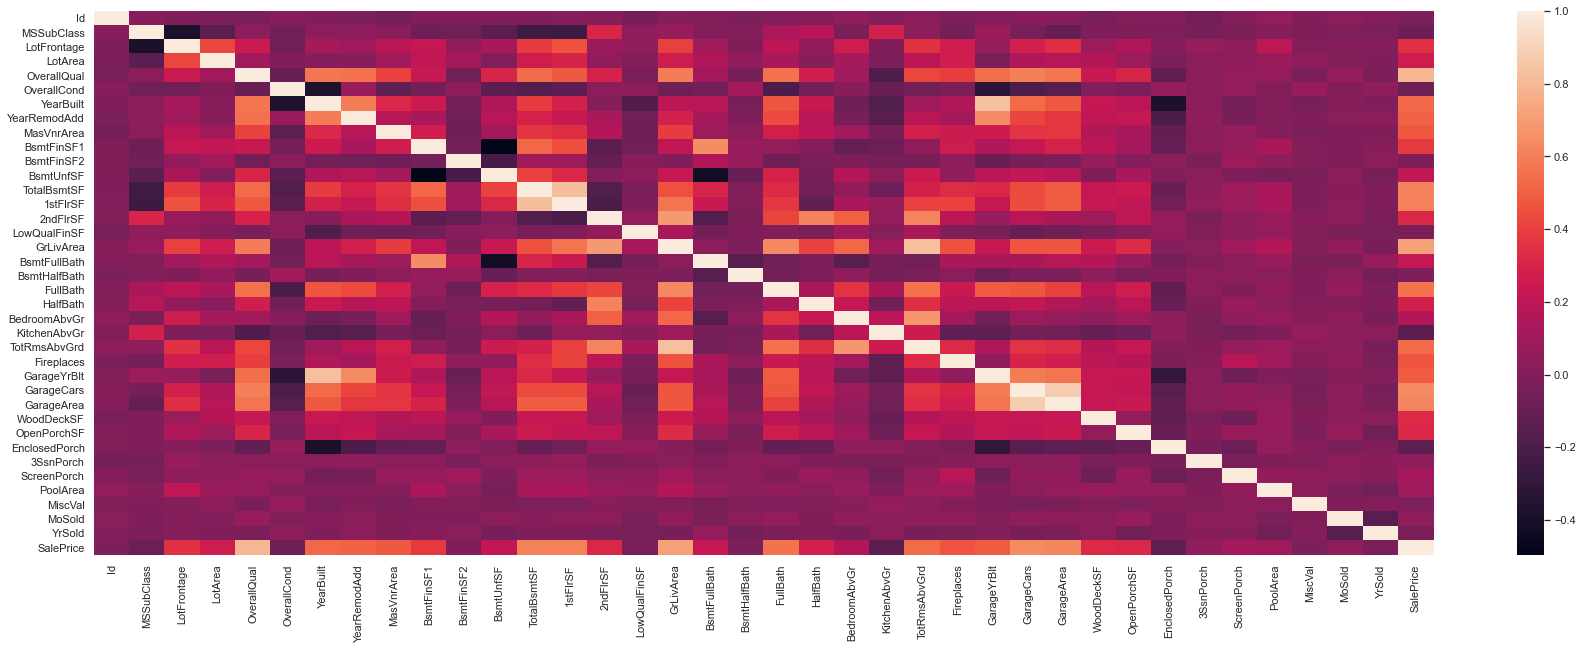

In [12]:
#It is really hard to figure out the respective correlations. So a better way is just to create a heatmap.
plt.figure(figsize=(30,10))
sns.heatmap(train_df.corr())

As we can see, 


*   YearBuilt
*   OverallQual

*   TotalBsmtSF

*   FirstFlrSF
*   GRLivArea


*   GarageArea

are the features that have high correlation with House sale price and should give us more predictability power when I train_df this dataset with any algorithm. Also its important to make sure that these features remain intact after data cleaning.




## EXPLORATORY DATA ANALYSIS

array([[<AxesSubplot:title={'center':'Id'}>,
        <AxesSubplot:title={'center':'MSSubClass'}>,
        <AxesSubplot:title={'center':'LotFrontage'}>,
        <AxesSubplot:title={'center':'LotArea'}>,
        <AxesSubplot:title={'center':'OverallQual'}>,
        <AxesSubplot:title={'center':'OverallCond'}>],
       [<AxesSubplot:title={'center':'YearBuilt'}>,
        <AxesSubplot:title={'center':'YearRemodAdd'}>,
        <AxesSubplot:title={'center':'MasVnrArea'}>,
        <AxesSubplot:title={'center':'BsmtFinSF1'}>,
        <AxesSubplot:title={'center':'BsmtFinSF2'}>,
        <AxesSubplot:title={'center':'BsmtUnfSF'}>],
       [<AxesSubplot:title={'center':'TotalBsmtSF'}>,
        <AxesSubplot:title={'center':'1stFlrSF'}>,
        <AxesSubplot:title={'center':'2ndFlrSF'}>,
        <AxesSubplot:title={'center':'LowQualFinSF'}>,
        <AxesSubplot:title={'center':'GrLivArea'}>,
        <AxesSubplot:title={'center':'BsmtFullBath'}>],
       [<AxesSubplot:title={'center':'BsmtHalfBath'

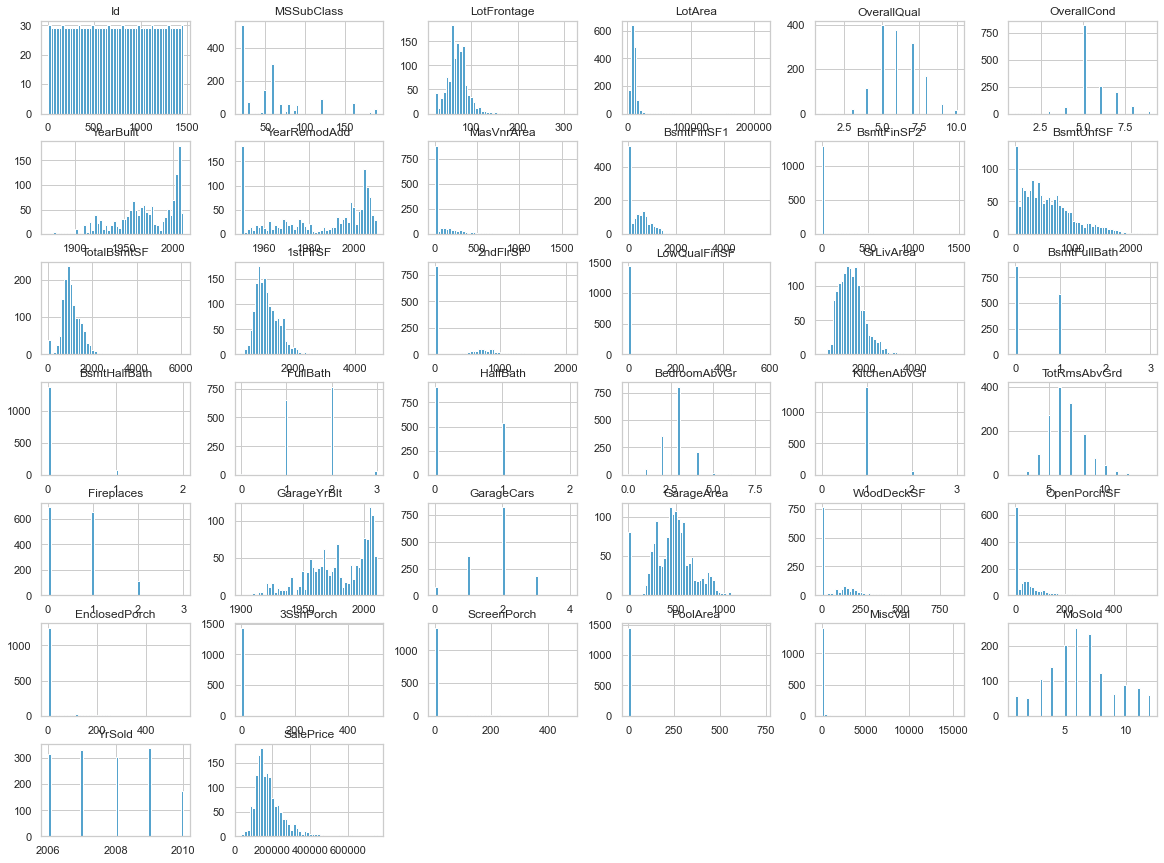

In [13]:
train_df.hist(bins=50, figsize=(20,15))

<AxesSubplot:title={'center':'Sale Price of the Houses'}, xlabel='SalePrice', ylabel='Count'>

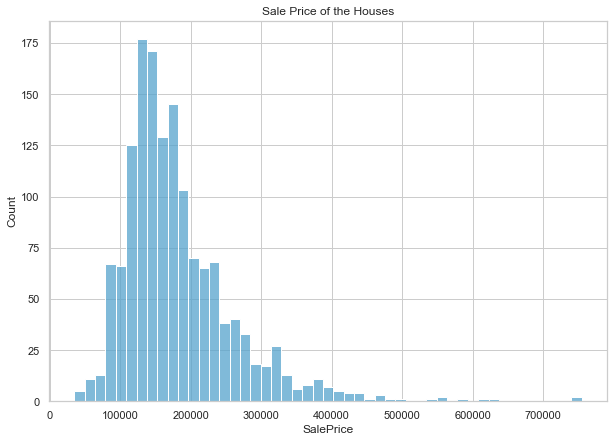

In [14]:
# lets have look at the label
plt.figure(figsize=(10,7))
plt.title( 'Sale Price of the Houses')
sns.histplot(x= 'SalePrice', data  = train_df, )

Most of the houses are priced between 100000 and 200000.

<AxesSubplot:xlabel='SalePrice'>

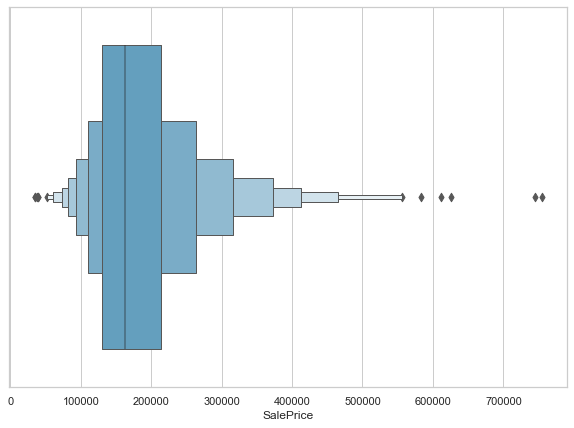

In [15]:
plt.figure(figsize=(10,7))
sns.boxenplot(x = 'SalePrice', data = train_df, orient = "v")

<AxesSubplot:xlabel='YearBuilt', ylabel='SalePrice'>

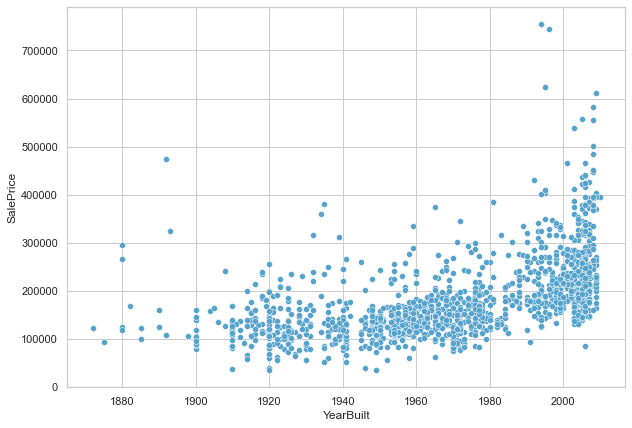

In [16]:
# Corr b/w YearBuilt and SalesPrice
plt.figure(figsize=(10,7))
sns.scatterplot(x= 'YearBuilt', y = 'SalePrice', data= train_df)

Text(0.5, 1.0, 'Correlation between Overall Qual and Sale Price')

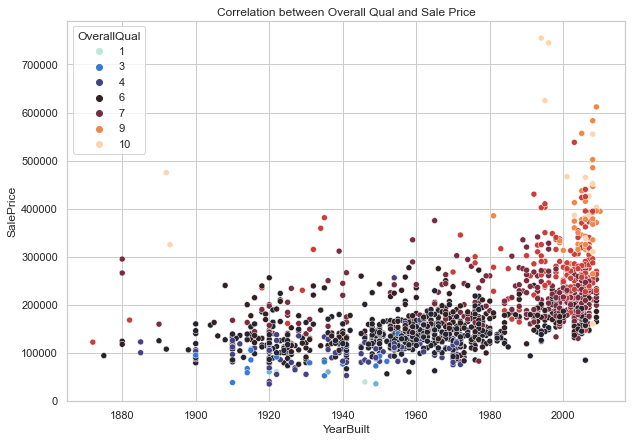

In [17]:
# OverallQuality
plt.figure(figsize=(10,7))
sns.scatterplot(x= 'YearBuilt' , y = 'SalePrice',hue = 'OverallQual',
                palette = 'icefire',data = train_df)
plt.title('Correlation between Overall Qual and Sale Price')

Text(0.5, 1.0, 'Basement area vs Sale Price')

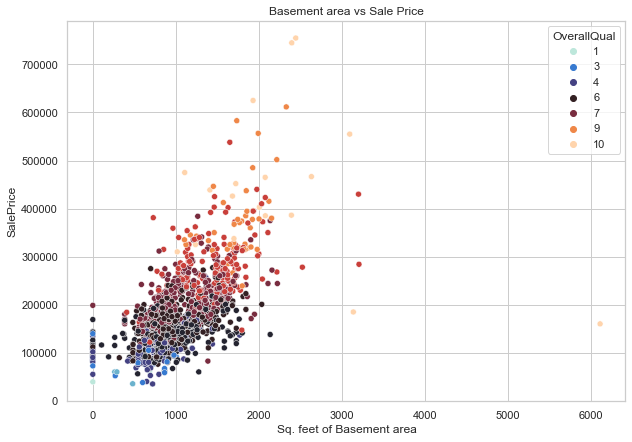

In [18]:
plt.figure(figsize=(10,7))
sns.scatterplot(x = 'TotalBsmtSF', y = 'SalePrice',hue = 'OverallQual', data = train_df, 
                palette = 'icefire')
plt.xlabel('Sq. feet of Basement area')
plt.title('Basement area vs Sale Price')

<AxesSubplot:xlabel='1stFlrSF', ylabel='SalePrice'>

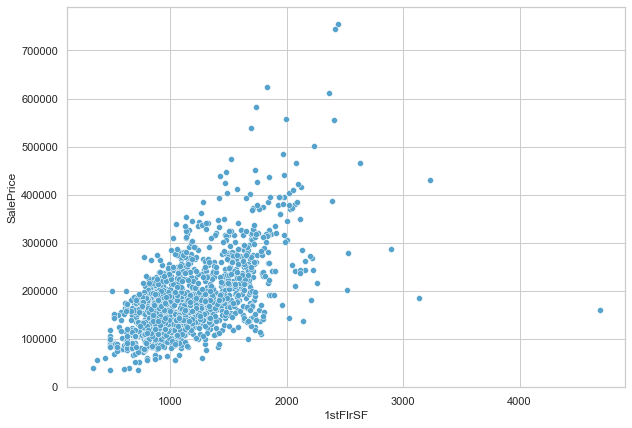

In [19]:
plt.figure(figsize=(10,7))
sns.scatterplot(x = '1stFlrSF', y = 'SalePrice', data = train_df)

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

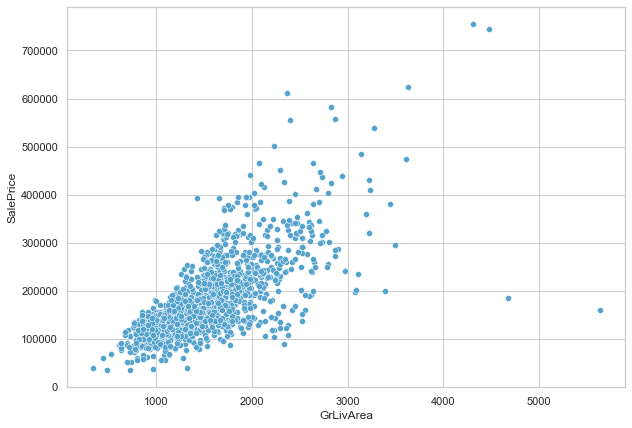

In [20]:
plt.figure(figsize=(10,7))
sns.scatterplot(x = 'GrLivArea', y = 'SalePrice', data = train_df)

## DATA PREPROCESSING AND CLEANING

Lookin at the missing values

In [21]:
# using pandas let's get actual number of missing values per feature
train_df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

<AxesSubplot:>

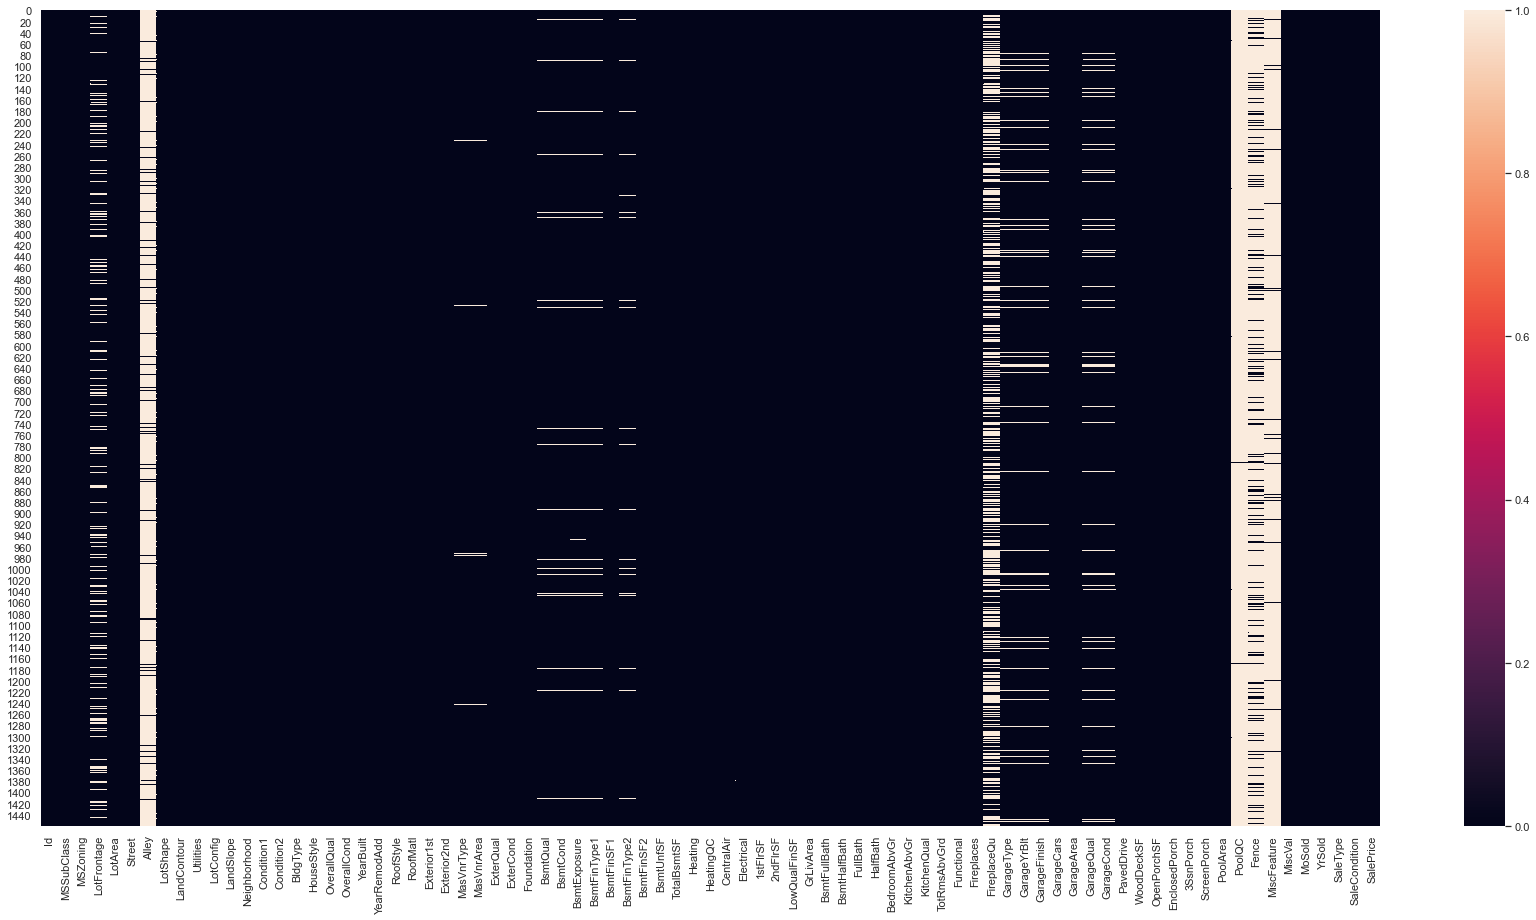

In [22]:
# Again heatmap
plt.figure(figsize=(30,15))
sns.heatmap(train_df.isnull())

In [23]:
# its confusing and cluttered thats we need to segregate between numeric and category columns

In [24]:
# selecting numerical and object features
# for train_df dataset
train_num_df = train_df.select_dtypes(exclude = ['object']).columns
train_cat_df = train_df.select_dtypes(include = ['object']).columns

In [25]:
# for test dataset
test_num_df = test_df.select_dtypes(exclude = ['object']).columns
test_cat_df = test_df.select_dtypes(include = ['object']).columns

filling training dataset missing values

In [26]:
# lets find out the missing values for numeric columns
train_df[train_num_df].isnull().sum().sort_values(ascending= False)[:10]

LotFrontage     259
GarageYrBlt      81
MasVnrArea        8
BsmtFinSF1        0
LowQualFinSF      0
2ndFlrSF          0
1stFlrSF          0
TotalBsmtSF       0
BsmtUnfSF         0
BsmtFinSF2        0
dtype: int64

In [27]:
#ratio of missing values
train_df[train_num_df].isnull().mean().sort_values(ascending=False)[:10]

LotFrontage     0.177397
GarageYrBlt     0.055479
MasVnrArea      0.005479
BsmtFinSF1      0.000000
LowQualFinSF    0.000000
2ndFlrSF        0.000000
1stFlrSF        0.000000
TotalBsmtSF     0.000000
BsmtUnfSF       0.000000
BsmtFinSF2      0.000000
dtype: float64

Not a high ratio so can be replaced by mean values

In [28]:
train_df["LotFrontage"].fillna(train_df["LotFrontage"].mean(), inplace=True)

train_df["GarageYrBlt"].fillna(train_df["GarageYrBlt"].mean(), inplace=True)

train_df["MasVnrArea"].fillna(train_df["MasVnrArea"].mean(), inplace=True)

print("train_df num cols missin value:",train_df[train_num_df].isnull().sum().sort_values(ascending=False)[:10])

train_df num cols missin value: SalePrice       0
BsmtFinSF1      0
GrLivArea       0
LowQualFinSF    0
2ndFlrSF        0
1stFlrSF        0
TotalBsmtSF     0
BsmtUnfSF       0
BsmtFinSF2      0
MasVnrArea      0
dtype: int64


In [29]:
# lets find out the missing values for category columns
train_df[train_cat_df].isnull().sum().sort_values(ascending=False)[:17]

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
GarageCond        81
GarageQual        81
GarageFinish      81
GarageType        81
BsmtFinType2      38
BsmtExposure      38
BsmtFinType1      37
BsmtQual          37
BsmtCond          37
MasVnrType         8
Electrical         1
Condition2         0
dtype: int64

In [30]:
#ratio
train_df[train_cat_df].isnull().mean().sort_values(ascending=False)[:17]

PoolQC          0.995205
MiscFeature     0.963014
Alley           0.937671
Fence           0.807534
FireplaceQu     0.472603
GarageCond      0.055479
GarageQual      0.055479
GarageFinish    0.055479
GarageType      0.055479
BsmtFinType2    0.026027
BsmtExposure    0.026027
BsmtFinType1    0.025342
BsmtQual        0.025342
BsmtCond        0.025342
MasVnrType      0.005479
Electrical      0.000685
Condition2      0.000000
dtype: float64

In [31]:
# The first 5 have high percentage of missing values, so its better to drop them
train_df.drop(["PoolQC","MiscFeature","Alley","Fence", 'FireplaceQu' ], axis=1, inplace=True)

In [32]:
train_df.shape

(1460, 76)

In [33]:
train_df["GarageCond"].fillna("Ta", inplace=True)
train_df["GarageQual"].fillna("Ta", inplace=True)
train_df["GarageFinish"].fillna("Unf", inplace=True)
train_df["GarageType"].fillna("Attchd", inplace=True)
train_df["BsmtCond"].fillna("TA", inplace=True)
train_df["BsmtQual"].fillna("TA", inplace=True)
train_df["BsmtExposure"].fillna("No", inplace=True)
train_df["BsmtFinType2"].fillna("Unf", inplace=True)
train_df["BsmtFinType1"].fillna("Unf", inplace=True)
train_df["MasVnrType"].fillna("None", inplace=True)
train_df["MSZoning"].fillna("RL", inplace=True)
train_df["Utilities"].fillna("AllPub", inplace=True)
train_df["Functional"].fillna("Typ", inplace=True)
train_df["Exterior2nd"].fillna("VinylSd", inplace=True)
train_df["KitchenQual"].fillna("TA", inplace=True)
train_df["Electrical"].fillna("SBrkr", inplace=True)

Replacing missing values of Test dataset

In [34]:
# numerical columns
test_df[test_num_df].isnull().sum().sort_values(ascending=False)

LotFrontage      227
GarageYrBlt       78
MasVnrArea        15
BsmtHalfBath       2
BsmtFullBath       2
GarageArea         1
BsmtFinSF1         1
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
GarageCars         1
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
LowQualFinSF       0
LotArea            0
MSSubClass         0
1stFlrSF           0
2ndFlrSF           0
YrSold             0
GrLivArea          0
MoSold             0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
Id                 0
dtype: int64

In [35]:
# can be replaced as they are low in count and mean
test_df["LotFrontage"].fillna(test_df["LotFrontage"].mean(), inplace=True)
test_df["GarageYrBlt"].fillna(test_df["GarageYrBlt"].mean(), inplace=True)
test_df["MasVnrArea"].fillna(test_df["MasVnrArea"].mean(), inplace=True)
test_df["BsmtHalfBath"].fillna(test_df["BsmtHalfBath"].mean(), inplace=True)
test_df["BsmtFullBath"].fillna(test_df["BsmtFullBath"].mean(), inplace=True)
test_df["BsmtFinSF2"].fillna(test_df["BsmtFinSF2"].mean(), inplace=True)
test_df["GarageCars"].fillna(test_df["GarageCars"].mean(), inplace=True)
test_df["GarageArea"].fillna(test_df["GarageArea"].mean(), inplace=True)
test_df["TotalBsmtSF"].fillna(test_df["TotalBsmtSF"].mean(), inplace=True)
test_df["BsmtUnfSF"].fillna(test_df["BsmtUnfSF"].mean(), inplace=True)
test_df["BsmtFinSF1"].fillna(test_df["BsmtFinSF1"].mean(), inplace=True)

In [36]:
#categorical columns
test_df[test_cat_df].isnull().sum().sort_values(ascending=False)[:23]


PoolQC          1456
MiscFeature     1408
Alley           1352
Fence           1169
FireplaceQu      730
GarageCond        78
GarageQual        78
GarageFinish      78
GarageType        76
BsmtCond          45
BsmtQual          44
BsmtExposure      44
BsmtFinType2      42
BsmtFinType1      42
MasVnrType        16
MSZoning           4
Utilities          2
Functional         2
KitchenQual        1
SaleType           1
Exterior2nd        1
Exterior1st        1
Heating            0
dtype: int64

In [37]:
test_df[test_cat_df].isnull().mean().sort_values(ascending=False)[:23]

PoolQC          0.997944
MiscFeature     0.965045
Alley           0.926662
Fence           0.801234
FireplaceQu     0.500343
GarageCond      0.053461
GarageQual      0.053461
GarageFinish    0.053461
GarageType      0.052090
BsmtCond        0.030843
BsmtQual        0.030158
BsmtExposure    0.030158
BsmtFinType2    0.028787
BsmtFinType1    0.028787
MasVnrType      0.010966
MSZoning        0.002742
Utilities       0.001371
Functional      0.001371
KitchenQual     0.000685
SaleType        0.000685
Exterior2nd     0.000685
Exterior1st     0.000685
Heating         0.000000
dtype: float64

In [38]:
# columns with high ratio are should be dropped
test_df.drop(["PoolQC","MiscFeature","Alley","Fence", 'FireplaceQu'], axis=1, inplace=True)

In [39]:
test_df["GarageCond"].fillna("TA", inplace=True)
test_df["GarageQual"].fillna("TA", inplace=True)
test_df["GarageFinish"].fillna("Unf", inplace=True)
test_df["GarageFinish"].fillna("Unf", inplace=True)
test_df["GarageType"].fillna("Attchd", inplace=True)
test_df["BsmtCond"].fillna("TA", inplace=True)
test_df["BsmtQual"].fillna("TA", inplace=True)
test_df["BsmtExposure"].fillna("No", inplace=True)
test_df["BsmtFinType2"].fillna("Unf", inplace=True)
test_df["BsmtFinType1"].fillna("GLQ", inplace=True)
test_df["MasVnrType"].fillna("None", inplace=True)
test_df["MSZoning"].fillna("RL", inplace=True)
test_df["Utilities"].fillna("AllPub", inplace=True)
test_df["Functional"].fillna("Typ", inplace=True)
test_df["Exterior2nd"].fillna("VinylSd", inplace=True)
test_df["KitchenQual"].fillna("TA", inplace=True)
test_df["SaleType"].fillna("WD", inplace=True)
test_df["Exterior1st"].fillna("VinylSd", inplace=True)

In [40]:
test_df.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MiscVal          0
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
Length: 75, dtype: int64

In [41]:
train_df.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 76, dtype: int64

Encoding the categorical columns


In [42]:
train_cat_cols = train_df.select_dtypes(include=["object"]).columns
test_cat_cols = test_df.select_dtypes(include=["object"]).columns

train_df = pd.get_dummies(train_df, columns = train_cat_cols, drop_first=True)
test_df = pd.get_dummies(test_df, columns = test_cat_cols, drop_first=True)

In [43]:
print(test_df.shape)
train_df.shape

(1459, 217)


(1460, 236)

In [44]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 236 entries, Id to SaleCondition_Partial
dtypes: float64(3), int64(35), uint8(198)
memory usage: 715.9 KB


In [45]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Columns: 217 entries, Id to SaleCondition_Partial
dtypes: float64(11), int64(26), uint8(180)
memory usage: 678.3 KB


All the features are now numericals

Skew in the data

In [50]:
skew_cols = train_df[train_num_df].apply(lambda x: skew(x)).sort_values(ascending=False)

high_skew = skew_cols[skew_cols > 0.5]
print(high_skew)

skew_index = high_skew.index

# Normalize skewed features
train_df[skew_index] = np.log1p(train_df[skew_index])

MiscVal          24.451640
PoolArea         14.813135
LotArea          12.195142
3SsnPorch        10.293752
LowQualFinSF      9.002080
KitchenAbvGr      4.483784
BsmtFinSF2        4.250888
ScreenPorch       4.117977
BsmtHalfBath      4.099186
EnclosedPorch     3.086696
MasVnrArea        2.673661
LotFrontage       2.382499
OpenPorchSF       2.361912
SalePrice         1.880941
BsmtFinSF1        1.683771
WoodDeckSF        1.539792
TotalBsmtSF       1.522688
MSSubClass        1.406210
1stFlrSF          1.375342
GrLivArea         1.365156
BsmtUnfSF         0.919323
2ndFlrSF          0.812194
OverallCond       0.692355
TotRmsAbvGrd      0.675646
HalfBath          0.675203
Fireplaces        0.648898
BsmtFullBath      0.595454
dtype: float64


In [53]:
skew_cols = test_df[test_num_df].apply(lambda x: skew(x)).sort_values(ascending=False)

high_skew = skew_cols[skew_cols > 0.5]
print(high_skew)

skew_index = high_skew.index

# Normalize skewed features
test_df[skew_index] = np.log1p(train_df[skew_index])

PoolArea         14.334868
3SsnPorch         7.636194
LowQualFinSF      7.328252
MiscVal           5.034796
BsmtHalfBath      3.887238
ScreenPorch       3.117102
KitchenAbvGr      2.953306
BsmtFinSF2        2.455778
EnclosedPorch     2.061495
HalfBath          0.541470
dtype: float64


In [54]:
y = train_df["SalePrice"]
X = train_df[test_df.columns]

## Feature Scaling

In [55]:
#  train data scaling
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X = scaler.fit_transform(X)

In [56]:
# test data scaling
test_cols = test_df.columns
test = scaler.fit_transform(test_df)
test = pd.DataFrame(test_df, columns=test_cols)

test.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1461,1.631370,1.646667,2.306780,5,6,1961,1961,1.837880,2.023008,...,0,0,0,0,1,0,0,0,1,0
1,1462,1.397363,1.685370,2.319405,6,6,1958,1958,0.000000,2.065156,...,0,0,0,0,1,0,0,0,1,0
2,1463,1.631370,1.655196,2.334879,5,5,1997,1998,1.807264,1.972450,...,0,0,0,0,1,0,0,0,1,0
3,1464,1.660640,1.631370,2.318892,6,6,1998,1998,0.000000,1.853152,...,0,0,0,0,1,0,0,0,1,0
4,1465,1.631370,1.694266,2.357574,8,5,1992,1992,1.925822,2.013056,...,0,0,0,0,1,0,0,0,1,0


In [57]:
#splitting the datasets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

## Modelling and Evaluation

Linear Regression

In [58]:
from sklearn.metrics import mean_squared_error

In [59]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred = lin_reg.predict(X_test)

In [60]:
scores = np.sqrt(mean_squared_error(y_test, y_pred))
scores

0.11077677380938054

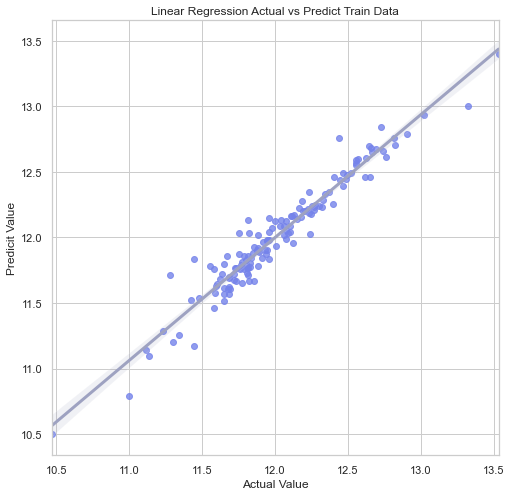

In [61]:
plt.figure(figsize=(8,8))
sns.regplot(y_test, y_pred, scatter_kws=dict(color="#7583EA"), line_kws=dict(color="#9EA2C1", linewidth=3))
plt.title("Linear Regression Actual vs Predict Train Data")
plt.xlabel("Actual Value")
plt.ylabel("Predicit Value")
plt.show()

## ENSEMBLE TECHINQUES

In [69]:
dt_reg = DecisionTreeRegressor()
dt_reg.fit(X_train, y_train)
y_pred = dt_reg.predict(X_test)

In [68]:
scores = np.sqrt(mean_squared_error(y_test, y_pred))
scores

0.17634188760395483

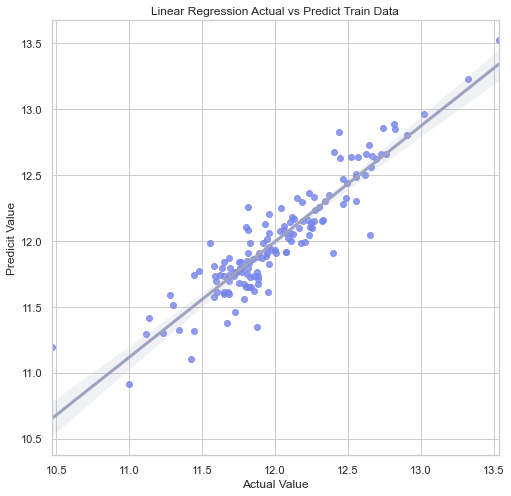

In [64]:
plt.figure(figsize=(8,8))
sns.regplot(y_test, y_pred, scatter_kws=dict(color="#7583EA"), line_kws=dict(color="#9EA2C1", linewidth=3))
plt.title("DT Regressor Actual vs Predict Train Data")
plt.xlabel("Actual Value")
plt.ylabel("Predicit Value")
plt.show()

Random forest regressor

In [65]:
forest = RandomForestRegressor()
forest.fit(X_train, y_train)
ypred = forest.predict(X_test)

In [66]:
scores = np.sqrt(mean_squared_error(y_test, y_pred))
scores

0.17634188760395483

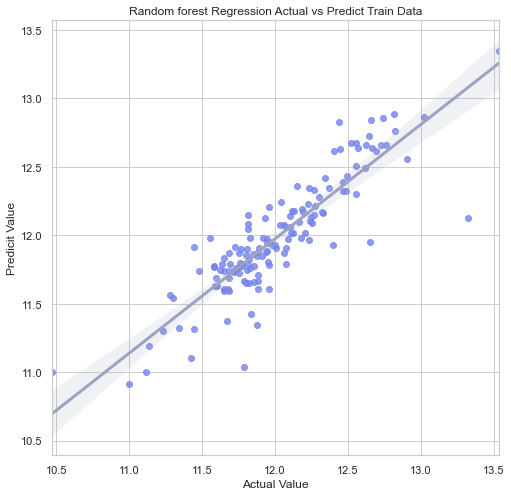

In [70]:
plt.figure(figsize=(8,8))
sns.regplot(y_test, y_pred, scatter_kws=dict(color="#7583EA"), line_kws=dict(color="#9EA2C1", linewidth=3))
plt.title("Random forest Regression Actual vs Predict Train Data")
plt.xlabel("Actual Value")
plt.ylabel("Predicit Value")
plt.show()

 Gradient boosting regressor

In [71]:
gbr = GradientBoostingRegressor()
gbr.fit(X_train, y_train)
y_pred = gbr.predict(X_test)


In [72]:
scores = np.sqrt(mean_squared_error(y_test, y_pred))
scores

0.11971631887968934

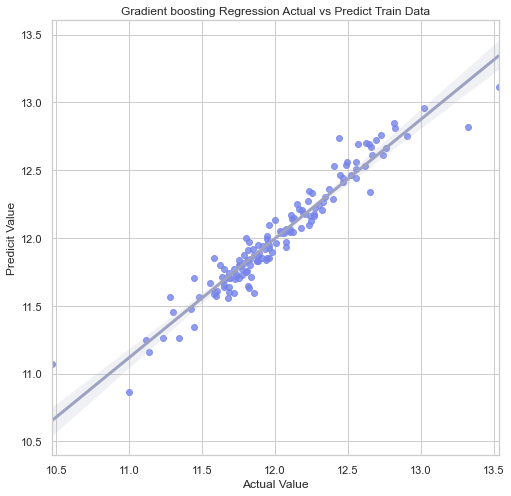

In [73]:
plt.figure(figsize=(8,8))
sns.regplot(y_test, y_pred, scatter_kws=dict(color="#7583EA"), line_kws=dict(color="#9EA2C1", linewidth=3))
plt.title("Gradient boosting Regression Actual vs Predict Train Data")
plt.xlabel("Actual Value")
plt.ylabel("Predicit Value")
plt.show()

XGB Regressor

In [74]:
xgb = XGBRegressor()
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)

In [75]:
scores = np.sqrt(mean_squared_error(y_test, y_pred))
scores

0.1551006281378807

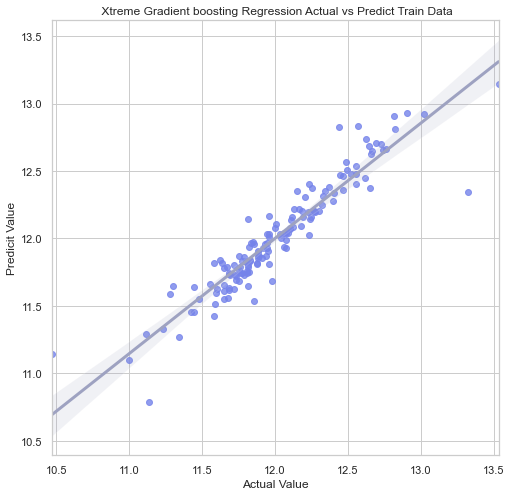

In [76]:
plt.figure(figsize=(8,8))
sns.regplot(y_test, y_pred, scatter_kws=dict(color="#7583EA"), line_kws=dict(color="#9EA2C1", linewidth=3))
plt.title(" Xtreme Gradient boosting Regression Actual vs Predict Train Data")
plt.xlabel("Actual Value")
plt.ylabel("Predicit Value")
plt.show()

## Hyperparameter tuning

Gradient boosting trees perform the best. So now we can make ever better results by tuning the hyperparameters.

In [112]:
from sklearn.model_selection import GridSearchCV

param_grid = [
 {'n_estimators': [3, 10, 30, 100], 'max_features': [2, 4, 6, 8, 10]},
 {'n_estimators': [3, 10], 'max_depth' : [2,3,5],
  'learning_rate':[0.1, 0.2, 0.5, 0.75, 1, 1.5, 2.0]},
]
grid_search = GridSearchCV(gbr, param_grid, cv= 10, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=GradientBoostingRegressor(max_features=8),
             param_grid=[{'max_features': [2, 4, 6, 8, 10],
                          'n_estimators': [3, 10, 30, 100]},
                         {'learning_rate': [0.1, 0.2, 0.5, 0.75, 1, 1.5, 2.0],
                          'max_depth': [2, 3, 5], 'n_estimators': [3, 10]}],
             scoring='neg_mean_squared_error')

In [113]:
# best hyperparameters to get the lowest MSE
grid_search.best_params_

{'max_features': 10, 'n_estimators': 100}

In [114]:
# Lowest error
grid_search.best_score_

-0.01971208225536758

In [115]:
grid_search.best_estimator_

GradientBoostingRegressor(max_features=10)

In [116]:
cvres = grid_search.cv_results_

In [117]:
# scores for all the various hyperparameters
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
   print(np.sqrt(-mean_score), params)

0.3686910158108639 {'max_features': 2, 'n_estimators': 3}
0.31889567146032277 {'max_features': 2, 'n_estimators': 10}
0.2394180309121277 {'max_features': 2, 'n_estimators': 30}
0.166801889916286 {'max_features': 2, 'n_estimators': 100}
0.35760941441533767 {'max_features': 4, 'n_estimators': 3}
0.2939607409198344 {'max_features': 4, 'n_estimators': 10}
0.20401906838243283 {'max_features': 4, 'n_estimators': 30}
0.15353196282480377 {'max_features': 4, 'n_estimators': 100}
0.35108417905975114 {'max_features': 6, 'n_estimators': 3}
0.2831275576013276 {'max_features': 6, 'n_estimators': 10}
0.1918949093281335 {'max_features': 6, 'n_estimators': 30}
0.1452548566579074 {'max_features': 6, 'n_estimators': 100}
0.3487417305210338 {'max_features': 8, 'n_estimators': 3}
0.2679640852294482 {'max_features': 8, 'n_estimators': 10}
0.18316269641067356 {'max_features': 8, 'n_estimators': 30}
0.14239425627196747 {'max_features': 8, 'n_estimators': 100}
0.3432304764819694 {'max_features': 10, 'n_estimat

In [ ]:
# Let's try to get the best score

In [118]:
gbr = GradientBoostingRegressor(max_features =8, n_estimators = 100, learning_rate= 0.1, random_state = 42)
gbr.fit(X_train, y_train)
y_pred = gbr.predict(X_test)

In [119]:
scores = np.sqrt(mean_squared_error(y_test, y_pred))
scores

0.1328320581224803

Predicting on the Test dataset

In [92]:
gbr = GradientBoostingRegressor(max_features =8, n_estimators = 100, )

In [120]:
test_predictions = gbr.predict(test_df)

In [122]:
sub = pd.DataFrame()
sub['Id']  = test_df.Id
sub['SalePrice'] = test_predictions
sub.to_csv('submission.csv',index=False)